IMPORTING THE NUMBERS AND LABELS.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
from sklearn.datasets import load_digits
from sklearn import metrics # imported for calculating the accuracy using confusion matrics

In [5]:
digits = load_digits()

In [7]:
print(digits.data.shape) # total 1797 iamge samples and the array has 64 dimensionality in sklearn library
print(digits.target.shape)

(1797, 64)
(1797,)


SHOWING THE SAMPLE IMAGES.

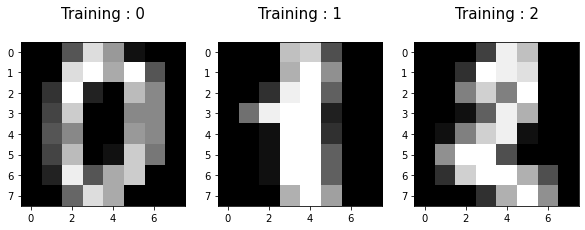

In [17]:
plt.figure(figsize=(10,5))
for index, (image,label) in enumerate(zip(digits.data[0:3],digits.target[0:3])):
    plt.subplot(1,3,index + 1)
    plt.imshow(np.reshape(image,(8,8)))
    plt.gray()
    plt.title("Training : %i\n" %label, fontsize = 15)

In [15]:
# from sklearn.datasets import load_digits

# dgts = load_digits()
# print(dgts.data.shape)
# import matplotlib.pyplot as plt
# plt.gray()
# plt.matshow(dgts.images[1])
# plt.show()

# this is how the label images are retrived and visualized from sklearn
# data = it is a data matrix
# target = the target regarding classification

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target, test_size=0.3)

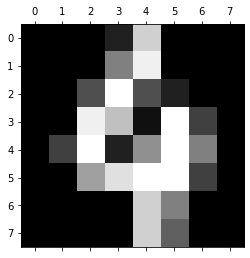

In [22]:
plt.matshow(digits.images[100])
plt.show()

In [27]:
x_train.shape,x_test.shape

((1257, 64), (540, 64))

Here we have input values is x_train which we are gonna train and also we have y_train which consists the label information about the sample image. i.e. it contains the information regarding the number whether it is 1 or 2 or 3 etc.

In [29]:
x_train # since it is in pixelated form so we have 64 dimensionality.

array([[ 0.,  0.,  6., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ..., 16., 13.,  1.],
       [ 0.,  0., 12., ..., 10.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  8., ...,  2.,  0.,  0.],
       [ 0.,  0.,  7., ...,  2.,  0.,  0.]])

In [30]:
y_train # exact labels.

array([1, 6, 5, ..., 1, 5, 8])

# Fitting The Data Into The Model

In [32]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()

In [33]:
lreg.fit(x_train,y_train)

C:\Users\PRIYAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

predicting for one image :

In [36]:
print(lreg.predict(x_test[1].reshape(1, -1)))

[1]


It predicted the number image as 1.

Again for some more images :

In [39]:
print(lreg.predict(x_test[0:20]))

[4 1 3 6 5 4 4 3 6 7 9 7 4 7 6 5 3 6 8 1]


# Predicting the whole dataset


In [40]:
prediction = lreg.predict(x_test)

# Accuracy prediction using Confusion Metrix  

In [55]:
cm = metrics.confusion_matrix(y_test,prediction)
print(cm)

[[58  0  1  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  2  0]
 [ 0  1 52  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  0  0]
 [ 0  0  0  0 53  0  0  1  1  0]
 [ 1  0  0  0  0 47  1  0  0  0]
 [ 0  0  0  0  1  2 56  0  0  0]
 [ 0  0  0  0  0  0  0 58  1  0]
 [ 0  2  1  0  0  0  0  0 46  3]
 [ 0  0  0  1  0  1  0  0  2 44]]


This is how confusion Matrix looks for our model.

<AxesSubplot:>

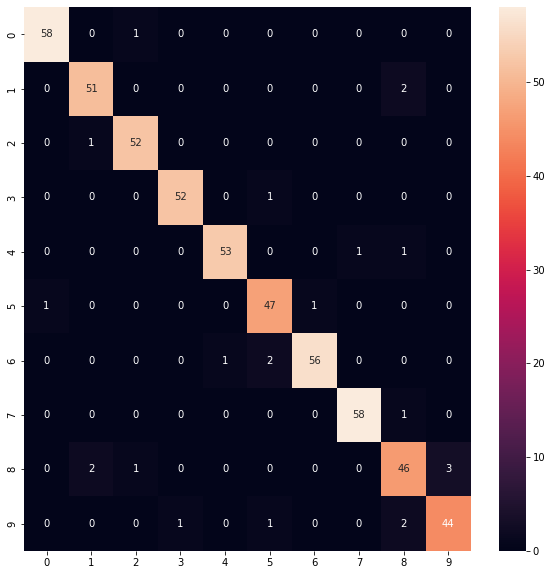

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.94      0.96      0.95        53
           2       0.96      0.98      0.97        53
           3       0.98      0.98      0.98        53
           4       0.98      0.96      0.97        55
           5       0.92      0.96      0.94        49
           6       0.98      0.95      0.97        59
           7       0.98      0.98      0.98        59
           8       0.88      0.88      0.88        52
           9       0.94      0.92      0.93        48

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



From here we can say our model is 96% accurate.

In [64]:
print(y_test[20:30])

[6 3 4 0 5 3 6 0 1 8]


In [65]:
print(prediction[20:30])

[4 3 4 0 0 5 6 0 1 8]
